<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/NaturalLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this Sprint
Learn the sequence of natural language processing
Learn how to vectorize natural language
How to learn
Let's take a look at a series of flows using a standard data set for natural language processing.

Vectorization of natural language
Natural Language Processing (NLP) is a technology that allows computers to process natural language which is used by humans in everyday life. In this section, we will consider the use of natural language as input for machine learning.

Since many machine learning methods assume the input of numerical data (quantitative variables), it is necessary to convert natural language text data into numerical data. This is called natural language vectorization. Various methods have been considered so that the characteristics of text data can be captured well during vectorization, and we will learn them in this Sprint.

Unstructured data

As a classification of data, we sometimes refer to structured data ,as a form that is easy for a computer to handle, such as numbers summarized in a table, and unstructured data as a form that is easy for a human to handle, such as images, video, text and sound. The vectorization of natural language can be said to be the process of converting unstructured data into structured data. For unstructured data, this transformation is not so necessary when using deep learning on images, but for text it is important to know how to do it.

What can natural language processing do?

You can do many things by using natural language text for machine learning inputs and outputs. Machine translation is an example of text input and output, and has been put to practical use. Research is also progressing on image caption generation where the input is an image and the output is text, and vice versa.

However, it is more difficult to make the output unstructured data like text or images. One relatively easy thing to do is to use text classification, where the input is text and the output is a category.

As a staple like iris, titanic and handwritten numbers, there is a sentiment analysis of the IMDB movie review dataset. It is a binary classification of whether a review document is positive or negative towards a film. The positive or negative for each document is given a label. This is what we will use in this Sprint.

Preparation of IMDB Movie Review Data Set
Prepare the IMDB movie review dataset.

download
Download with the following wget command.

In [1]:
# Download IMDB to current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Unzip
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsup removed as unlabeled
!rm -rf aclImdb/train/unsup
# Show IMDB dataset description
!cat aclImdb/README

--2024-07-14 14:05:50--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  17.2MB/s    in 8.3s    

2024-07-14 14:05:58 (9.72 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

It is a dataset published on the following sites.

Sentiment Analysis
https://ai.stanford.edu/~amaas/data/sentiment/

Reading
Load using scikit-learn load_files.

sklearn.datasets.load_files — scikit-learn 0.21.3 documentation
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_files.html

<< code to read >>

In [2]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# Display of correspondence between 0,1 and meaning of label
print(train_review.target_names)

['neg', 'pos']


About this dataset
If you look inside, you can see that it contains English sentences.

In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


IMDB stands for Internet Movie Database, a movie database site.

Ratings and Reviews for New Movies and TV Shows-IMDb https://www.imdb.com/

This site allows users to post a 1 to 10 rating and comment on a movie. From that database, we have created a dataset of 25,000 training data and 25,000 test data.

Binary labeling is performed with 4 points or less as negative and 7 points or less as positive review, which is used to classify emotions. 5,6 neutral reviews are not included in the dataset. In addition, the labels are evenly packed for training and testing. For details, please check the README that you downloaded.

Classic method
Let's take a look at BoW and TF-IDF, which are classic but still powerful.

BoW

A simple but effective method is BoW (Bag of Words). This is a vector that counts the number of times a word appears in a sample. It is one-hot representation of words as categories.

example

As an example, we have extracted the first five words of three sentences from the IMDB dataset.

In [4]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

Let's apply BoW to these three sentences. Use CountVectorizer of scikit-learn.

sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.21.3
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
documentation

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample mini_dataset
mini_dataset = ["This is a sample dataset.", "It contains several sentences.", "CountVectorizer will be used on this dataset."]

# Create the CountVectorizer object with the specified token pattern
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')

# Fit the CountVectorizer to the mini_dataset and transform it into a bag-of-words array
bow = vectorizer.fit_transform(mini_dataset).toarray()

# Create a DataFrame using the bag-of-words array and the feature names
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())

# Display the DataFrame
display(df)

,a,be,contains,countvectorizer,dataset,is,it,on,sample,sentences,several,this,used,will
0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,1,1,0,0,0
2,0,1,0,1,1,0,0,1,0,0,0,1,1,1


The eight words that appear in the three sentences in the example are column names, and the 0,1, and 2 samples show how many times they appear. In the second sample "Very bad. Very, very bad.", Bad appeared twice and very appeared three times. Data set has words that are column names that we call vocabulary.

By BoW, each sample becomes a feature quantity with the dimension of the number of vocabulary, and it becomes possible to input the text to the machine learning model. The whole text used at this time that is called Corpus. The vocabulary is determined by the words contained in the corpus, and the model is trained using the vocabulary as features. Therefore, vocabularies that first appear in the test data are ignored when vectorized.

Pretreatment

The CountVectorizer class automatically performs preprocessing, which is the alignment of uppercase letters to lowercase. This kind of preprocessing is important in natural language processing, and is usually done separately to remove unwanted symbols (text cleaning ) Aand to ensure consistency of spelling.

For words whose forms change, such as 'see', 'saw' and 'sentence', we sometimes use a process called stemming, which aligns the word with the stem.

token

The BoW does not strictly count words, but rather chunks, defined as token.

What is to be the token is specified in the CountVectorizer by the argument token_patternand the notation regular expression. The default is r '(? u) \ b \ w \ w + \ b'but in the above example uses r '(? u) \ b \ w + \ b'.

By default, two or more characters enclosed by spaces, punctuation marks, slashes, etc. are extracted as one token, so "a", "I", etc. are not counted. In English, one-letter words are often excluded because they do not express the characteristics of the sentence. However, in the above example, the argument is specified so that a single-character word is also extracted as a token.

"Regular expression"

Regular expressions are also used during preprocessing, but we won't go into the details here. Regular expressions can be manipulated by the re module in Python.

re — regular expression operation
https://docs.python.org/3/library/re.html

When using regular expressions, the following services that can check the results in real time are useful.

Online regex tester and debugger: PHP, PCRE, Python, Golang and JavaScript
https://regex101.com/

Morphological analysis

In many languages such as English, tokenization can be done by the easy-to-understand criterion of being blank, but in Japanese it cannot be done.

In Japanese, the units are divided by one part of speech which are different from nouns, particles and verbs : segmentation. For example, the Japanese sentence "I will learn programming" becomes "I / will / learn / programming".

For this purpose, we use morphological analysis tools such as MeCab and Janome which can be used from Python, and WebGreen beans https://chamame.ninjal.ac.jp/ , which is a service provided by the National Institute for Japanese Language.

There is an open source dictionary for MeCab, mecab-ipadic-NEologd, which is updated weekly.

mecab-ipadic-neologd / README.ja.md at master neologd / mecab-ipadic-neologd
https://github.com/neologd/mecab-ipadic-neologd/blob/master/README.ja.md

n-gram

In the BoW example above, we counted the number of appearances for each word (token), but this does not consider the word order at all.

To take this into account, we sometimes apply the concept of n-gram T, where neighbouring words are grouped together, or 2-gram (bigram) A, where two words are grouped together

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample mini_dataset
mini_dataset = ["This is a sample dataset.", "It contains several sentences.", "CountVectorizer will be used on this dataset."]

# Create the CountVectorizer object with the specified ngram_range and token pattern
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')

# Fit the CountVectorizer to the mini_dataset and transform it into a bag-of-words array
bow_train = vectorizer.fit_transform(mini_dataset).toarray()

# Create a DataFrame using the bag-of-words array and the feature names
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())

# Display the DataFrame
display(df)

,a sample,be used,contains several,countvectorizer will,is a,it contains,on this,sample dataset,several sentences,this dataset,this is,used on,will be
0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,1,0,0,1,0,0,1,0,1,1


The 2-gram counts "very good" and "very bad" separately.

If the words are not grouped together, they are called 1-gram (unigram) Any number of 3-grams (trigram) can be considered, e.g. 3-grams (trigram) up to 3. 1-grams and 2-grams can be combined to form a BoW.

[Problem 1] Scratch implementation of BoW

Create a program that requires BoW in the following three sentences without using scikit-learn. Please calculate with 1-gram and 2-gram.

TF-IDF
As an evolutionary method of BoWTF-IDFis also often used. This is a Term Frequency (TF)and Inverse Document Frequency (IDF)This is a combination of the two indicators

<Standard TF-IDF formula>

Term Frequency:

IDF

IDF is an index that makes the token value extremely large in the dataset.

Let's check the graph where the number of samples $ df (t) $ where the number of samples where the token appears is changed and the number of samples $ N $ is set to 25000 according to the training data of the IMDB movie review data set.

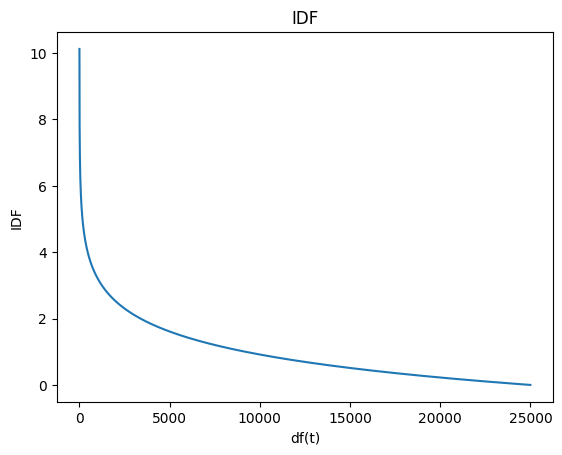

In [9]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

Since this number is multiplied by the number of appearances in TF-IDF, it means that the appearance of rare tokens is weighted.

Stop word

Tokens that appear too frequently may be pre-processed by removing them as well as reducing their value. The token to be removed is called Stop word. This can be obtained from an existing list of stop words or by using a threshold value.

In CountVectorizer of scikit-learn, it processes by specifying it in the argument stop_words as a list.

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample mini_dataset
mini_dataset = ["This is a sample dataset.", "It contains several sentences.", "CountVectorizer will be used on this dataset."]

# Create the CountVectorizer object with specified stop words and token pattern
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')

# Fit the CountVectorizer to the mini_dataset and transform it into a bag-of-words array
bow_train = vectorizer.fit_transform(mini_dataset).toarray()

# Create a DataFrame using the bag-of-words array and the feature names
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())


A typical existing list of stop words is that of the natural language processing library NLTK. It is advisable to check the contents of the list before using it, as it may contain words that are of particular importance for a given dataset

In [13]:
# Download Stopword for first time use
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


On the contrary, tokens that appear less frequently are often removed. This is because if all tokens are used, the number of dimensions of the vector will increase significantly and the calculation cost will increase.

In Scikit-learn's CountVectorizer, it processes by specifying the maximum number of vocabulary in max_features argument. In the example below, the number of occurrences is 5 and vectorization is performed.

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample mini_dataset
mini_dataset = ["This is a sample dataset.", "It contains several sentences.", "CountVectorizer will be used on this dataset."]

# Create the CountVectorizer object with specified token pattern and max_features
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features=5)

# Fit the CountVectorizer to the mini_dataset and transform it into a bag-of-words array
bow_train = vectorizer.fit_transform(mini_dataset).toarray()

# Create a DataFrame using the bag-of-words array and the feature names
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())

# Display the DataFrame
display(df)

,a,be,contains,dataset,this
0,1,0,0,1,1
1,0,0,1,0,0
2,0,1,0,1,1


[Problem 2] TF-IDF calculation
Vectorize the IMDB movie review dataset with TF-IDF. Use NLTK's stopword and Settings maximum vocabulary to about 5000. Pretreatment such as text cleaning and stemming is not required for this issue.

Use either of the following classes of scikit-learn to calculate TF-IDF.

sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

Note that scikit-learn uses a formula that differs from the standard formula.

Also, by default, the argumentnorm="l2"is set, so that L2 normalization is applied to each sample. By settingnorm=None, no normalization will be performed.

Term Frequency:

t
f
(
t
,
d
)
=
n
t
,
d
$ n_ {t, d} $: Number of occurrences of token t in sample d

The scikit-learn TF has the same denominator as BoW without the denominator.

Inverse Document Frequency:

The bottom of *log is the Napier number e

For more information, check the following documents

5.2.3.4. tf-idf term weighting - scikit-learn 0.21.3 documentation

https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting



Problem 3] Learning with TF-IDF

Please train and estimate the IMDB film review dataset using the vectors obtained in Problem 2. The model should be arbitrary and capable of binary classification.

We do not require a high degree of accuracy here, but you can test the impact by varying the maximum number of vocabulary words, stop words, and n-grams.

Problem 4: Scratch mounting of TF-IDF

Please create a program that can find the TF-IDF of the following three statements without using scikit-learn. Please create two types of expressions, one standard and one employed by scikit-learn. Normalization is not required.

​Word2Vec is a vectorization method using a neural network.

Since BoW and TF-IDF were one-hot representations, the dimension of the resulting vector is the number of vocabularies. This makes it difficult to increase the number of vocabulary words. On the other hand, Word2Vec converts words into vectors of arbitrary dimensions. This is called Word Embedding or​ ​distributed representation. The transformation operation is often referred to as "embedding in vector space.

We will look at Word2Vec in turn because it has two different mechanisms, CBoW and Skip-gram.

CBoW

Word2Vec with CBoW (Continuous Bag-of-Words) trains a neural network with two full join layers to be able to estimate the words that come between one word and another.

Words are represented in one-hot representation of the vocabulary dimension of the corpus. Thus, the input and output dimensions will be the same as the vocabulary number. On the other hand, the number of nodes in the middle is the number of arbitrary dimensions to be obtained by Word2Vec. This makes the weight of all the combined layers equal to "the number of nodes of the desired dimension x the number of vocabulary words. After training with this network, the vector representing each vocabulary can be obtained by extracting the weights on the output side.

Because we are estimating the words between the words, we also have the advantage that words that can be substituted in the same place will have similar vectors. This is information not available with BoW or TF-IDF.

A given text will be an array of "the length of that text (number of words) x the number of dimensions of the distributed representation obtained by Word2Vec," but in order to input it into a model that needs to align the array of each input, short texts add words representing blanks padding or delete words in longer texts. If the text is fixed length (e.g. block) We call it to be

window size

The number of words to be entered is not only the number of words before and after the one to be estimated, but also the number of words before and after the one to be estimated. The size of how many before and after is called the window size.

Skip-gram

​Skip-gram is the opposite of CBoW in that it trains a two-layer neural network with two full join layers to be able to estimate the words before and after a word. After training, the weights on the input side are extracted and converted into a vector representing each vocabulary. Ski-gram is currently more commonly used than CBoW.

usage rules
In Python, this can be handled using the Gensim library.

gensim: models.word2vec - Word2vec embeddings
https://radimrehurek.com/gensim/models/word2vec.html

Let's try learning the same sentences as in the BoW example, but unlike CountVectorizer, we will split the words (tokens) in a list because it does not automatically do the preprocessing for us. Also, uppercase letters are aligned with lowercase letters, and symbols are removed.

The default parameters are calculated in CBoW. Also, the window size is set to window=5.

In [17]:
from gensim.models import Word2Vec

# Sample sentences
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]

# Create the Word2Vec model with the specified number of dimensions (vector size)
model = Word2Vec(min_count=1, vector_size=10)  # Set the number of dimensions to 10

# Build the vocabulary
model.build_vocab(sentences)

# Train the Word2Vec model
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)  # 'epochs' replaces 'iter'

# Print the vocabulary list
print("Vocabulary List: {}".format(list(model.wv.index_to_key)))

# Print the vectors for each word in the vocabulary
for vocab in model.wv.index_to_key:
    print("{} vector: \n{}".format(vocab, model.wv[vocab]))

Vocabulary List: ['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie']
very vector: 
[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
bad vector: 
[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
good vector: 
[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
is vector: 
[-0.07511629 -0.00930048  0.09538178 -0.07319212 -0.02333783 -0.01937753
  0.08077487 -0.05930933  0.00045163 -0.04753764]
this vector: 
[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
a vector: 
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
film vector: 
[-0.01577672  0.00321376 -0.04140681 -0.07682785 -0.01508027  0.02469826
 -0.00888038  0.0553

In this way, a vector is obtained.

Word Distance

By performing calculations between vectors, we can find words that have vectors similar to a word. For example, find three words with vectors similar to GOOD.

In [18]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.42731544375419617),
 ('bad', 0.32937225699424744),
 ('very', 0.3004249036312103)]

In the current example, only three sentences are learned, so it is not effective, but learning with a large corpus can produce interesting results, such as parallel relationships coming close together.

visualization (data, results, etc.)

By compressing the data into two dimensions, it is possible to visualize the positional relationship of each word. The following is an example using t-SNE.

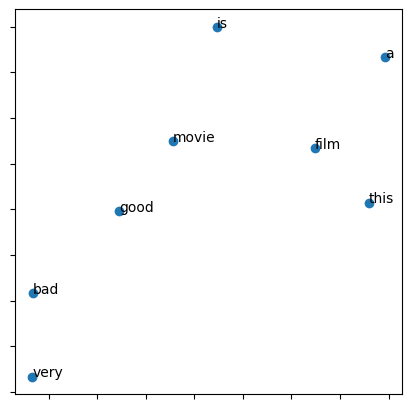

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Get the list of vocabulary words
vocabs = list(model.wv.index_to_key)

# Create a list of word vectors for the vocabulary words
vectors = np.array([model.wv[word] for word in vocabs])

# Initialize and fit the TSNE model
tsne_model = TSNE(perplexity=3, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(vectors)

# Plot the TSNE results
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(vocabs):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))

ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

Distributed representation of the IMDB film review dataset
Let's train Word2Vec on a corpus of training data from the IMDB movie review dataset to acquire a distributed representation.

Problem 5] Pre-processing of corpus
Pre-process your corpus by removing special characters (!, etc.), URLs, and lowercasing. ), URL removal, and capitalization. Words (tokens) should be split into lists.

Problem 6: Learning Word2Vec
Please study Word2Vec.

[Problem 7] (Advance assignment) Vector Visualization
Visualize the obtained vectors by t-SNE. Also, select some words and use wv.most_similar to find out which words are similar.

learned vector
The vectors obtained by training on a huge corpus are also publicly available, so you can use them without training yourself. In addition to the original Word2Vec, there are also FastText and Stanford GloVe, which are developed by the same author and published respectively.

[Issue 8] (Advance assignment) Classification of movie reviews using Word2Vec
Use the vectors learned in Problem 6 and the publicly available learned vectors to learn and estimate the sentiment classification for the IMDB movie review dataset.